# Analysis 1

#### Find the highest contributing players
#### Goals scored by a player to total goals scored by his entire team
#### Find the top 10 hishest contributors for the league
#### This analysis gives insight of which team is dependent on which of their players for goals

In [1]:
#Import statements
import json, os, glob, matplotlib as mpl, matplotlib.pyplot as plt, seaborn as sns, pandas as pd, numpy as np, itertools
import matplotlib.patches as mpatches
from datetime import datetime
from pandas import DataFrame

In [2]:
#Get data directory as a relative path for all 3 required fetched responses
current_dir = os.path.dirname('__file__')
data_dir = os.path.join(current_dir, '..', 'data','playerstats','*.json')
teams_dir = os.path.join(current_dir, '..', 'data','teams','*.json')
matches_dir = os.path.join(current_dir, '..', 'data','eventsseason','*.json')

In [3]:
# Get the list of all teams in EPL with their team id and team name 
for team_file_name in glob.glob(teams_dir):
    with open(team_file_name) as team_file_name:
        teams_df = pd.read_json(team_file_name, orient='columns')
        teams_df = teams_df.drop(['shortCode','name','defaultHomeVenue','isNational','shirtUrl','showAssistStats','showCardStats','showGoalStats','showLeagueTables'], axis = 1)
        

In [4]:
# Get the list of all events/matches and store in a variable
for filename in glob.glob(matches_dir):
    with open(filename) as fil:
        file = json.load(fil)

In [5]:
# Clean the data so that it matches with the data from other api 
teams_df=teams_df.set_value(2, 'shortName', 'Man United')
teams_df=teams_df.set_value(8, 'shortName', 'Middlesbrough')
teams_df=teams_df.set_value(14, 'shortName', 'Crystal Palace')
teams = teams_df.to_dict(orient='records')

In [6]:
# Generate the data frame
all_players = []
all_player_goals = []
all_team_goals = []
all_teams = []

for filename in glob.glob(data_dir):
    with open(filename) as fil:
        current_file= json.load(fil)
    
        # 
        team_id = filename.split('playerstats_response')[1].split('.json')[0]
        team_name = [team['shortName'] for team in teams if team['dbid'] == int(team_id)][0]
        
        # 
        players = [player['shortName'] for player in current_file]
        all_players.extend(players)
        
        # 
        goals = [player['playerstats'][0]['goals'] for player in current_file]
        all_player_goals.extend(goals)
        
        # 
        goals_scored_home = [int(event['intHomeScore']) for event in file['events'] if event['strHomeTeam']==team_name and event['intHomeScore']!=None]
        goals_scored_away = [int(event['intAwayScore']) for event in file['events'] if event['strAwayTeam']==team_name and event['intAwayScore']!=None]
        total_goals_scored=sum(goals_scored_away)+sum(goals_scored_home)
        for val in goals:
            all_team_goals.append(total_goals_scored)
            all_teams.append(team_name)

In [7]:
# Generate DataFrame
df = DataFrame({'player' :all_players, 'goals': all_player_goals})
df['teamGoals'] = all_team_goals
df['teamname'] = all_teams
df['percentContribution'] = round(df['goals']/df['teamGoals']*100, 2)

# Remove players who has not scored
df.drop(df[df['goals'] == 0].index, inplace=True)

In [8]:
# Sort in descending order or contribution and goals
df = df.sort_values(by=['percentContribution','goals'],ascending=False)

In [9]:
# Get the top ten to plot
player_contri_df=df.head(10)
player_contri_df

,goals,player,teamGoals,teamname,percentContribution
320,14,Defoe,26,Sunderland,53.85
15,24,Lukaku,60,Everton,40.00
101,17,Ibrahimović,48,Man United,35.42
242,8,Negredo,23,Middlesbrough,34.78
83,19,Sánchez,63,Arsenal,30.16
65,11,Llorente,37,Swansea,29.73
36,20,Kane,68,Tottenham,29.41
257,13,King,45,Bournemouth,28.89
154,12,Benteke,44,Crystal Palace,27.27
223,10,Deeney,37,Watford,27.03


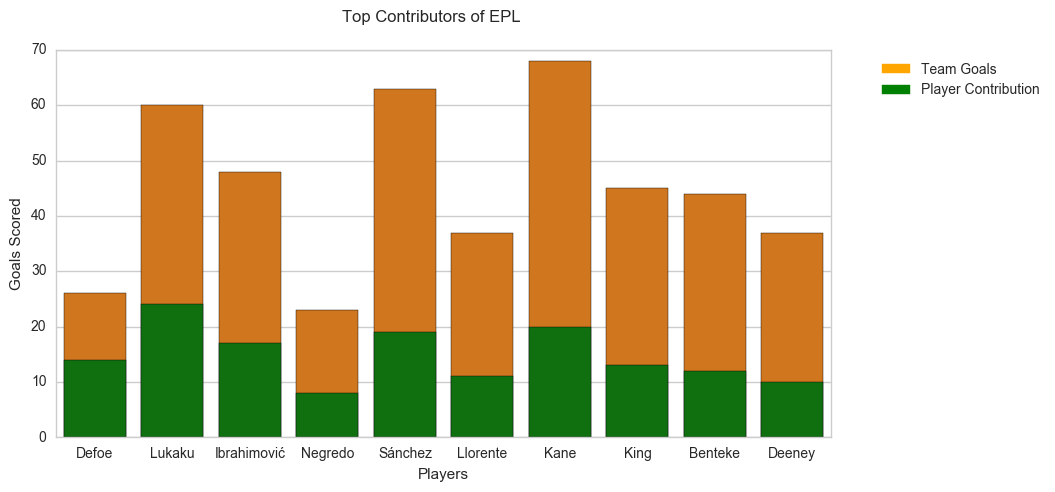

In [10]:
# Plot the top 10 players with their contributions
sns.set_style("whitegrid")

# 2 bar plots to generate team scores and player contribution in same plot
fig = plt.figure(figsize=(10,5))
bx = sns.barplot(x='player', y='teamGoals', data=player_contri_df, color='#EE7600')
bx = sns.barplot(x='player', y='goals', data=player_contri_df, color='g')

# To generate custom legends
team = mpatches.Patch(color='orange', label='Team Goals')
player = mpatches.Patch(color='green', label='Player Contribution')

# Beautify plot
bx.legend(handles=[team, player], bbox_to_anchor=(1.05, 1), loc=2)
plt.suptitle('Top Contributors of EPL')
bx.set(xlabel='Players', ylabel='Goals Scored')

plt.show()

In [11]:
#Function to create output data folder
def create_directory_for_output():
    current_dir = os.path.dirname('__file__')
    data_folder = os.path.join(current_dir, 'ana_1')
    if not os.path.exists(data_folder):
        os.mkdir(data_folder)
    return data_folder

output_folder=create_directory_for_output()

#csv file name and path
file_name = 'biggest_contributors'
file_path = os.path.join(output_folder, file_name)
file_path+='.csv'

#Save file to created output file
df.to_csv(file_path,index = False)

In [12]:
# File name
plot_name = 'biggest_contributors'
plot_path = os.path.join(output_folder, plot_name)
plot_path+='.png'

#Save the plot
fig.savefig(plot_path, bbox_inches='tight')   # save the figure to file